In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

N = [30, 100, 300]
D = 0.02        # en cm
rho_0 = 1e-5    # en C/m^3
Va = 0          # ambos V en Volts
Vb = 10
e_0 = 8.85e-12  # permisividad del vacío

def gauss_elimination(N, method = "standard"):
  h = D / (N + 1)

  x = np.linspace(h, D-h, N)
  rho = rho_0 * np.sin(np.pi * x / D)
  f = -rho / e_0
  fh2 = f * h**2
  fh2[0] -= Va
  fh2[-1] -= Vb

  # Construimos la matriz tridiagonal A
  A = np.zeros((N, N))
  for i in range(N):
      for j in range(N):
          if i == j:
              A[i, j] = -2.
          elif abs(i - j) == 1:
              A[i, j] = 1.

  # Initializamos el vector solucion v
  v = np.zeros(N)

  # eliminacion de Gauss
  if method == "standard":
    start = time.perf_counter()
    for i in range(N):  # i is the column index
        p1 = A[i, i]
        for j in range(N):  # j is the pivot row index
            if j > i:
                p2 = A[j, i]
                fh2[j] -= p2 * fh2[i] / p1
                A[j,:] -= p2 * A[i,:] / p1

    end = time.perf_counter()
    delta_t = end - start

  if method == "modified" :
    assert False

  # sustitucion
  for i in range(N - 1, -1, -1):
      suma = np.dot(A[i, i + 1:], v[i + 1:])
      v[i] = (fh2[i] - suma) / A[i, i]

  # Incluir los datos en los limites
  x_full = np.concatenate(([0], x, [D]))
  v_full = np.concatenate(([Va], v, [Vb]))

  rho_full = rho_0 * np.sin(np.pi * x_full / D) # Calculate rho for x_full
  f_full = -rho_full / e_0

  return [x_full, f_full, v_full, delta_t]



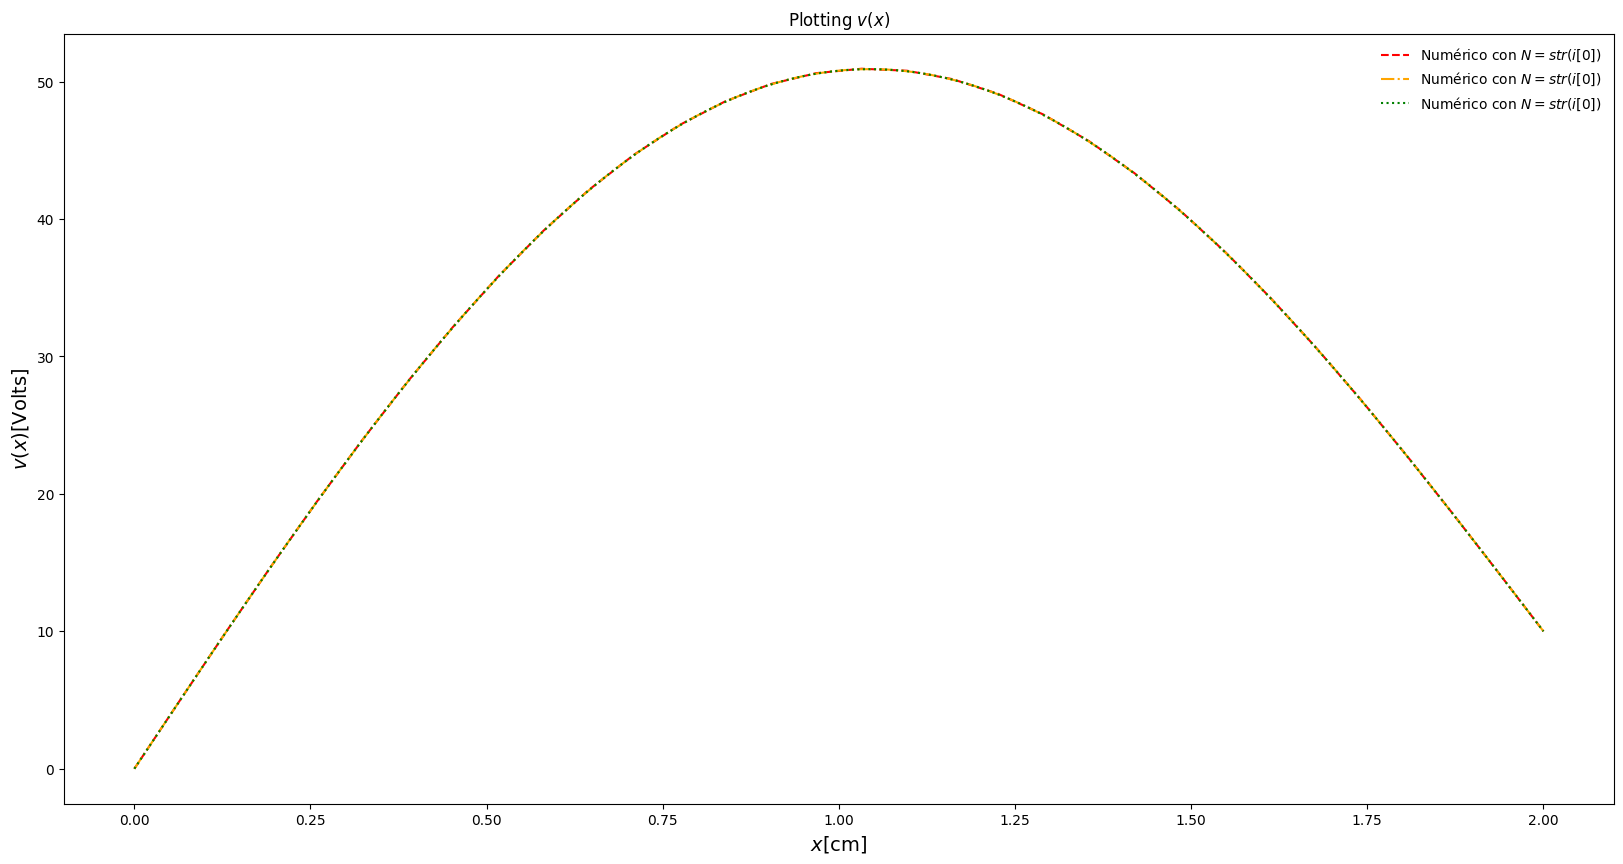

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Plotting ${v}({x})$')
plt.xlabel("${x} $[cm]", fontsize=14)
plt.ylabel("${v}({x}) $[Volts]", fontsize=14)

N_styles = [(30, 'red', '--'), (100, 'orange', '-.'), (300, 'green', ':')]
for i in N_styles:
    # Graficamos las soluciones v(x) para distintos N
    plt.plot(gauss_elimination(i[0], 'standard')[0]*100, gauss_elimination(i[0], 'standard')[2], color = i[1], ls = i[2], label = 'Numérico con $N = $'+'$str(i[0])$')
    if i[0] == 300:
         plt.plot(gauss_elimination(i[0], 'standard')[0]*100, vt, color='blue', label='Analítico')

plt.legend(loc='upper right', frameon=False)
plt.show()

In [ ]:
str_N = [str(x) for x in N]
delta_ts = pd.DataFrame(index = ['Standard', 'Modified'],columns = str_N)
for i in N:
    delta_ts = [gauss_elimination(i, 'standard')[3], gauss_elimination(i, 'modified')[3]]